<a href="https://colab.research.google.com/github/cahyogadhang/Face-Detector-Project/blob/main/smile_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 2

Number of detected faces: 1
Smile detected


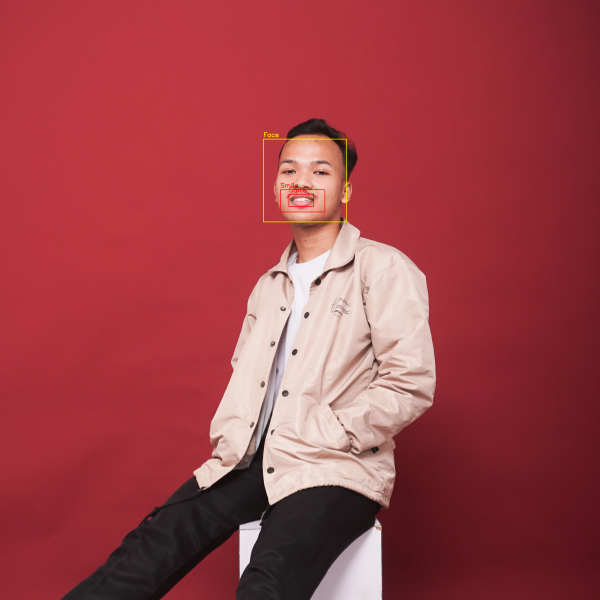

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

img = cv2.imread('/content/Cahyo Gadhang Putro Baskoro.jpg')

if img is None:
    print("Error: Gambar tidak ditemukan. Pastikan file ada di direktori yang benar.")
else:
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

    faces = face_cascade.detectMultiScale(gray_img, 1.1, 9)

    print('Number of detected faces:', len(faces))

    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
        cv2.putText(img, "Face", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

        roi_gray = gray_img[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)

        if len(smiles) > 0:
            print("Smile detected")
            for (sx, sy, sw, sh) in smiles:
                cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
                cv2.putText(roi_color, "Smile", (sx, sy - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        else:
            print("Smile not detected")

    # 🔹 Resize gambar agar lebarnya menjadi 600px, tinggi menyesuaikan
    fixed_width = 600  # Lebar yang diinginkan
    aspect_ratio = fixed_width / img.shape[1]  # Hitung rasio aspek
    new_height = int(img.shape[0] * aspect_ratio)  # Hitung tinggi baru

    img_resized = cv2.resize(img, (fixed_width, new_height), interpolation=cv2.INTER_AREA)

    cv2_imshow(img_resized)